# eQTL analysis using bcftools dosage
Before lauching the script, run this command to extract dosage:
`bcftools plugin dosage -r 2:127614931-128114931  /data1/antoine/data/genome_seq/ALL.chr2.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz > ijbhisdbvs.tsv`

## import libraries & read expression, dosage and patient list files

In [1]:
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
import matplotlib.pyplot as plt 

#this is the argument given to python when computing the correlation coefficients(predicted_epigenetic_marks, expr)
sys.argv=[" ","2_127864931",5000,"BIN1",1,100,500000]

exp=pd.read_csv("dosage_test_files/2_127864931.tsv",sep="\t")
dos=pd.read_csv("dosage_test_files/2_127864931_dosage_simple.tsv",sep="\t",low_memory=False,index_col=1)

dos.columns = [re.sub('\[[0-9]*\]','',x) for x in list(dos)]

with open("list_commun_patients") as f:
    list_p = f.readlines()

list_p = [x.strip() for x in list_p]
#for x in range(len(list_p)):
#    list_p[x] = list_p[x].split()

## format expression and dosage

In [2]:
expression=pd.DataFrame(np.empty([1,445]), columns=list_p)
dosage=pd.DataFrame(np.empty([dos.shape[0],445]), columns=list_p , index=list(dos.index))
for patient in list_p:
    expression[patient]=exp[patient]
    dosage[patient]=dos[patient].astype(str).astype(float)

## To view imported files:

In [3]:
#print(dosage)
#print(expression)

## perform correlation between SNPs and expression

In [4]:
%%capture
np.seterr(invalid='ignore',divide='ignore') #no warnings for SNP or expression with std==0
correlations=np.corrcoef(dosage,expression)
np.seterr(invalid='warn',divide='warn')     #re-establish warnings

In [5]:
#dosage.index-int(sys.argv[1].split('_')[1])
#correlations[-1][:-1].shape
#pd.DataFrame(data=correlations[-1][:-1],columns=["correlations"])#,index=dosage.index)

In [6]:
correlations=pd.DataFrame(data=correlations[-1][:-1],index=dosage.index-int(sys.argv[1].split('_')[1]),columns=["correlations"])

## To view correlations

In [7]:
#print(correlations)

## Plot eQTL values per position

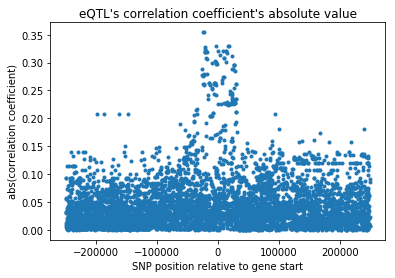

In [8]:
plt.plot(abs(correlations),'.')
plt.title("eQTL's correlation coefficient's absolute value")
plt.ylabel("abs(correlation coefficient)")
plt.xlabel("SNP position relative to gene start")
plt.show()
#plt.savefig('foo.png')"""